In [1]:
from dataset.dataset import get_Dataloader
from main import get_parameters

config = get_parameters().parse_args([])
_, test_dataloader, _ = get_Dataloader(config)


This is not a dir: /workspace/data/lgg-mri-segmentation/kaggle_3m/data.csv
This is not a dir: /workspace/data/lgg-mri-segmentation/kaggle_3m/README.md
path to the image: /workspace/data/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
path to the mask: /workspace/data/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_mask.tif
Train: (3005, 4) 
Val: (393, 4) 
Test: (531, 4)


In [3]:
# from models.U_Net import UNet
from models.UNet import UNet
from utils.utils import tensor2var
import torch
import numpy as np


# unet = UNet(1).cuda()
unet = UNet().cuda()

checkpoint = torch.load("checkpoint/220506/129.pth.tar")
unet.load_state_dict(checkpoint['state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']


RuntimeError: Error(s) in loading state_dict for UNet:
	Missing key(s) in state_dict: "encoder1.enc1conv1.weight", "encoder1.enc1norm1.weight", "encoder1.enc1norm1.bias", "encoder1.enc1norm1.running_mean", "encoder1.enc1norm1.running_var", "encoder1.enc1conv2.weight", "encoder1.enc1norm2.weight", "encoder1.enc1norm2.bias", "encoder1.enc1norm2.running_mean", "encoder1.enc1norm2.running_var", "encoder2.enc2conv1.weight", "encoder2.enc2norm1.weight", "encoder2.enc2norm1.bias", "encoder2.enc2norm1.running_mean", "encoder2.enc2norm1.running_var", "encoder2.enc2conv2.weight", "encoder2.enc2norm2.weight", "encoder2.enc2norm2.bias", "encoder2.enc2norm2.running_mean", "encoder2.enc2norm2.running_var", "encoder3.enc3conv1.weight", "encoder3.enc3norm1.weight", "encoder3.enc3norm1.bias", "encoder3.enc3norm1.running_mean", "encoder3.enc3norm1.running_var", "encoder3.enc3conv2.weight", "encoder3.enc3norm2.weight", "encoder3.enc3norm2.bias", "encoder3.enc3norm2.running_mean", "encoder3.enc3norm2.running_var", "encoder4.enc4conv1.weight", "encoder4.enc4norm1.weight", "encoder4.enc4norm1.bias", "encoder4.enc4norm1.running_mean", "encoder4.enc4norm1.running_var", "encoder4.enc4conv2.weight", "encoder4.enc4norm2.weight", "encoder4.enc4norm2.bias", "encoder4.enc4norm2.running_mean", "encoder4.enc4norm2.running_var", "bottleneck.bottleneckconv1.weight", "bottleneck.bottlenecknorm1.weight", "bottleneck.bottlenecknorm1.bias", "bottleneck.bottlenecknorm1.running_mean", "bottleneck.bottlenecknorm1.running_var", "bottleneck.bottleneckconv2.weight", "bottleneck.bottlenecknorm2.weight", "bottleneck.bottlenecknorm2.bias", "bottleneck.bottlenecknorm2.running_mean", "bottleneck.bottlenecknorm2.running_var", "upconv4.weight", "upconv4.bias", "decoder4.dec4conv1.weight", "decoder4.dec4norm1.weight", "decoder4.dec4norm1.bias", "decoder4.dec4norm1.running_mean", "decoder4.dec4norm1.running_var", "decoder4.dec4conv2.weight", "decoder4.dec4norm2.weight", "decoder4.dec4norm2.bias", "decoder4.dec4norm2.running_mean", "decoder4.dec4norm2.running_var", "upconv3.weight", "upconv3.bias", "decoder3.dec3conv1.weight", "decoder3.dec3norm1.weight", "decoder3.dec3norm1.bias", "decoder3.dec3norm1.running_mean", "decoder3.dec3norm1.running_var", "decoder3.dec3conv2.weight", "decoder3.dec3norm2.weight", "decoder3.dec3norm2.bias", "decoder3.dec3norm2.running_mean", "decoder3.dec3norm2.running_var", "upconv2.weight", "upconv2.bias", "decoder2.dec2conv1.weight", "decoder2.dec2norm1.weight", "decoder2.dec2norm1.bias", "decoder2.dec2norm1.running_mean", "decoder2.dec2norm1.running_var", "decoder2.dec2conv2.weight", "decoder2.dec2norm2.weight", "decoder2.dec2norm2.bias", "decoder2.dec2norm2.running_mean", "decoder2.dec2norm2.running_var", "upconv1.weight", "upconv1.bias", "decoder1.dec1conv1.weight", "decoder1.dec1norm1.weight", "decoder1.dec1norm1.bias", "decoder1.dec1norm1.running_mean", "decoder1.dec1norm1.running_var", "decoder1.dec1conv2.weight", "decoder1.dec1norm2.weight", "decoder1.dec1norm2.bias", "decoder1.dec1norm2.running_mean", "decoder1.dec1norm2.running_var", "conv.weight", "conv.bias". 
	Unexpected key(s) in state_dict: "conv_down1.0.weight", "conv_down1.0.bias", "conv_down1.2.weight", "conv_down1.2.bias", "conv_down2.0.weight", "conv_down2.0.bias", "conv_down2.2.weight", "conv_down2.2.bias", "conv_down3.0.weight", "conv_down3.0.bias", "conv_down3.2.weight", "conv_down3.2.bias", "conv_down4.0.weight", "conv_down4.0.bias", "conv_down4.2.weight", "conv_down4.2.bias", "conv_up3.0.weight", "conv_up3.0.bias", "conv_up3.2.weight", "conv_up3.2.bias", "conv_up2.0.weight", "conv_up2.0.bias", "conv_up2.2.weight", "conv_up2.2.bias", "conv_up1.0.weight", "conv_up1.0.bias", "conv_up1.2.weight", "conv_up1.2.bias", "conv_last.weight", "conv_last.bias". 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


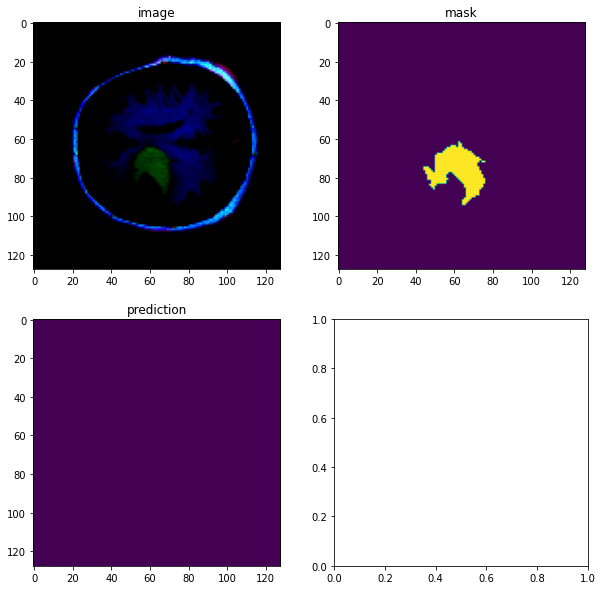

In [58]:
# image 
for i, (data, label) in enumerate(test_dataloader):

    unet.eval()

    data = tensor2var(data)
    label = tensor2var(label)

    with torch.no_grad():
        pred = unet(data)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

    ax[0, 0].imshow(data[0].cpu().numpy().transpose(1,2,0))
    ax[0, 0].set_title("image")
    ax[0, 1].imshow(label[0].cpu().numpy().transpose(1,2,0))
    ax[0, 1].set_title("mask")
    ax[1, 0].imshow(pred[0].cpu().numpy().transpose(1,2,0))
    ax[1, 0].set_title("prediction")
    plt.show()
    break

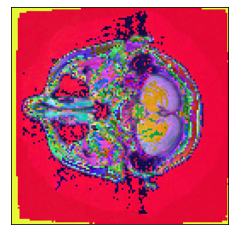

In [26]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path


grid = make_grid(data[0], label[0], pred[0])
show(grid)

In [27]:
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


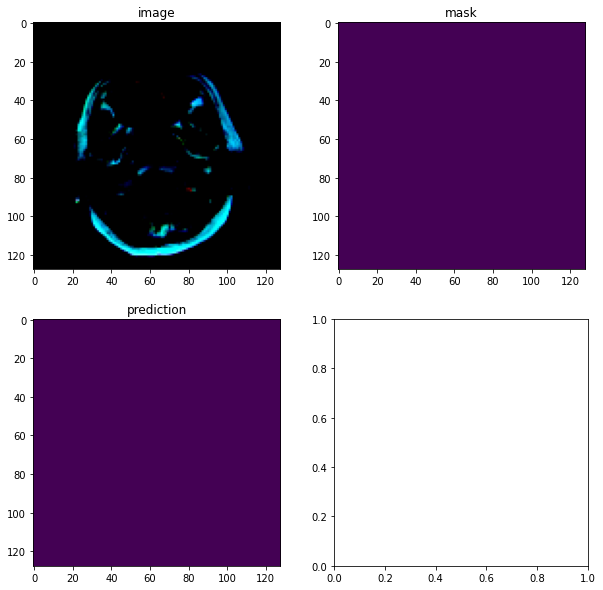

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(data[0].cpu().numpy().transpose(1,2,0))
ax[0, 0].set_title("image")
ax[0, 1].imshow(label[0].cpu().numpy().transpose(1,2,0))
ax[0, 1].set_title("mask")
ax[1, 0].imshow(pred[0].cpu().numpy().transpose(1,2,0))
ax[1, 0].set_title("prediction")
plt.show()